<a href="https://colab.research.google.com/github/ashwantmanikoth/ML_WorkFlow/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Create your own python notebook from code examples that downloads and imports the MNIST dataset.**

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Required libraries

In [217]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



## Load MNIST DATA

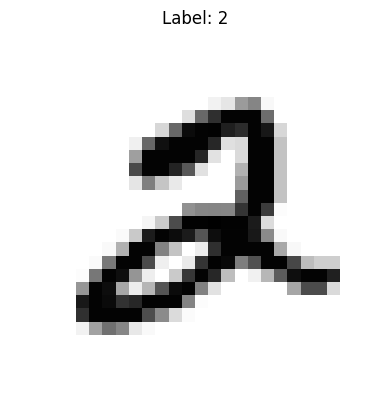

In [246]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.concatenate([x_train, x_test])
y_train = np.concatenate([y_train, y_test])
x_train = x_train / 255.0
x_train = 1 - x_train

MNIST data sets is loaded and preprocessed

# **2.Create a model by constructing your own selection of layers.**


In [247]:
model = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 128)               100480    
                                                                 
 dense_62 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


A simple Model 1 is generated

# **3.Train the model on the MNIST dataset for at least 10 epochs.**


In [248]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1750/1750 [==============================] - 7s 3ms/step - loss: 0.5411 - accuracy: 0.8390 - val_loss: 0.3423 - val_accuracy: 0.8992
Epoch 2/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3408 - accuracy: 0.8975 - val_loss: 0.2436 - val_accuracy: 0.9308
Epoch 3/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.2809 - accuracy: 0.9164 - val_loss: 0.2250 - val_accuracy: 0.9319
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2381 - accuracy: 0.9289 - val_loss: 0.2315 - val_accuracy: 0.9269
Epoch 5/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2103 - accuracy: 0.9364 - val_loss: 0.2207 - val_accuracy: 0.9301
Epoch 6/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1900 - accuracy: 0.9416 - val_loss: 0.1688 - val_accuracy: 0.9514
Epoch 7/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1770 - accuracy: 0.9457 - val_loss: 0.1622 - val_accuracy:

Model1 is trained with adam optimiser with 10 epochs

# **4.Capture the training history and plot the training and validation accuracy curves.**


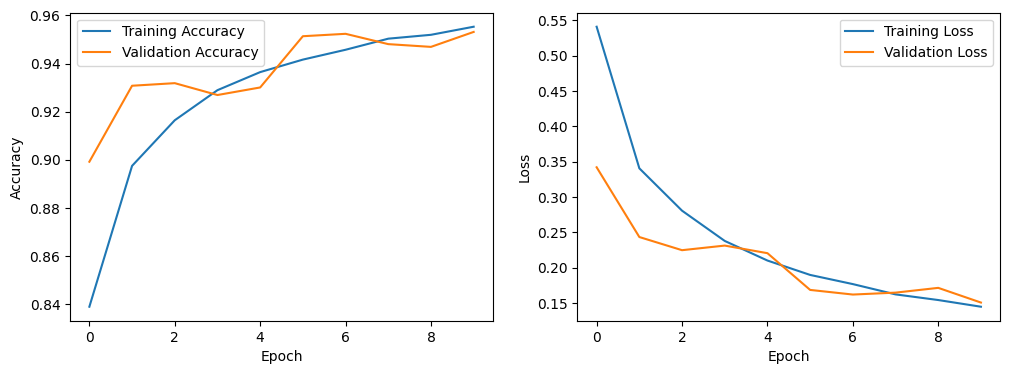

In [271]:
#Ploting Model with configuration 1
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model1 accuraly and loss graph is plotted,


# 5.Train the model again for a sufficient amount of epoch that you can start to see overfitting.
## Configuration #2 with additional Dense Layer

Model 2 with ectra dense layer is generated

In [270]:
model_2 = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),  # Additional Dense layer
    layers.Dense(10, activation='softmax')
])
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5103 - accuracy: 0.8445 - val_loss: 0.3988 - val_accuracy: 0.8678
Epoch 2/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.2860 - accuracy: 0.9121 - val_loss: 0.2261 - val_accuracy: 0.9307
Epoch 3/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2282 - accuracy: 0.9309 - val_loss: 0.1795 - val_accuracy: 0.9464
Epoch 4/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.1913 - accuracy: 0.9413 - val_loss: 0.1418 - val_accuracy: 0.9588
Epoch 5/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1721 - accuracy: 0.9467 - val_loss: 0.1624 - val_accuracy: 0.9516
Epoch 6/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.1534 - accuracy: 0.9519 - val_loss: 0.1565 - val_accuracy: 0.9518
Epoch 7/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1409 - accuracy: 0.9555 - val_loss: 0.1549 - val_accuracy:

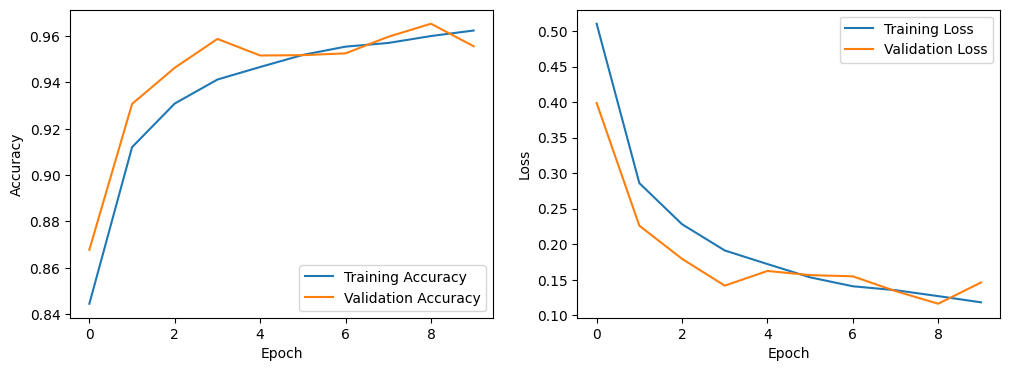

In [272]:
# plot_history([('model_2', history_2)], key='accuracy')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model 2 graph is plotted, Almost similar to the original model result

## Configuration #3 with adifferent Optimizer

Epoch 1/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.6959 - accuracy: 0.8084 - val_loss: 0.3968 - val_accuracy: 0.8847
Epoch 2/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.3868 - accuracy: 0.8874 - val_loss: 0.3218 - val_accuracy: 0.9071
Epoch 3/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.3427 - accuracy: 0.8989 - val_loss: 0.2848 - val_accuracy: 0.9199
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3152 - accuracy: 0.9088 - val_loss: 0.2777 - val_accuracy: 0.9192
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2927 - accuracy: 0.9138 - val_loss: 0.2518 - val_accuracy: 0.9277
Epoch 6/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2741 - accuracy: 0.9198 - val_loss: 0.2457 - val_accuracy: 0.9276
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2565 - accuracy: 0.9242 - val_loss: 0.2284 - val_accuracy:

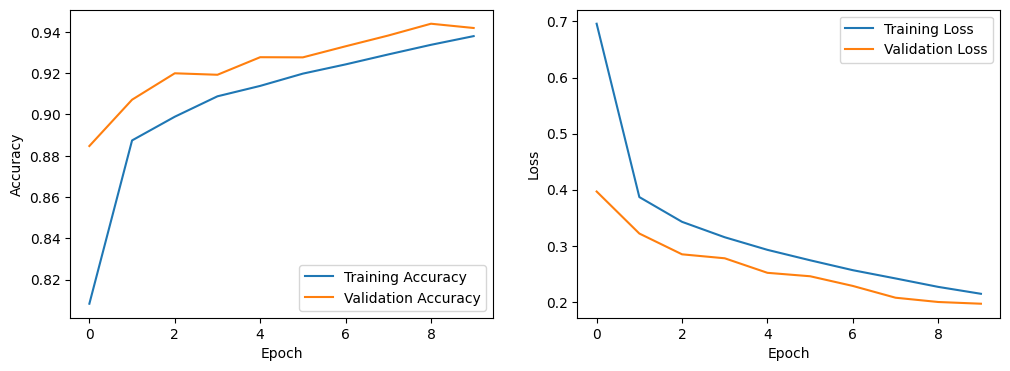

In [274]:
model_3 = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_3.compile(optimizer='sgd',  # Using Stochastic Gradient Descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, epochs=10, validation_split=0.2)

#plotting the configuration 3
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model 3 validation accuracy is reduced compared to model 1 and mode 2

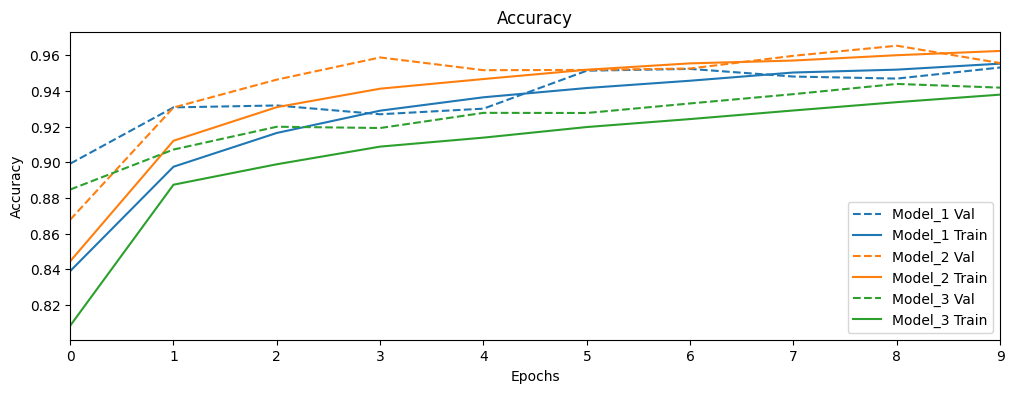

In [275]:
# Comparing All Models
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12,4))
    plt.title("Accuracy")
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')


    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.show()

plot_history([('model_1', history),
              ('model_2', history_2),
              ('model_3', history_3)], key='accuracy')

### **Comparison**
Comparning the three models, model 2 is having slight more increase in accuacy.
increasing more dense layer has shown improvement in the models performance.

In [138]:
y_train

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

# 7.Create a custom test set by capturing your own images, saving them in google drive, and importing them into your notebook.


In [276]:
from PIL import ImageOps

# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/Teaching/TME_6015/Assignment_1'
for folder_name in os.listdir(base_folder_path):

    folder_path = os.path.join(base_folder_path, folder_name)

    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.jpg'):
              # filename= filename.replace('.png',"")
              img_path = os.path.join(folder_path, filename)
              print(img_path)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              # img = img.rotate(-90)
              # img = ImageOps.invert(img)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

filename nine-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/9/nine-1.png
filename eight-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/8/eight-1.png
filename seven-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/7/seven-1.png
filename six-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/6/six-1.png
filename .DS_Store
filename five-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/5/five-1.png
filename four-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/4/four-1.png
filename three-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/3/three-1.png
filename two-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/2/two-1.png
filename two-2.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/2/two-2.png
filename two-3.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/2/two-3.png
filename one-1.png
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/1/one-1.png
filename zero-1.png
/content

In [277]:
custom_labels

array([9, 8, 7, 6, 5, 4, 3, 2, 2, 2, 1, 0])

In [278]:
display_image = custom_images[2] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

# 8.Generate classifications for your custom test set and report on the performance.

In [279]:
test_loss, test_acc = model.evaluate(custom_images, custom_labels, verbose=2)
print("Test Accuracy:", test_acc)

1/1 - 0s - loss: 0.6493 - accuracy: 0.8333 - 33ms/epoch - 33ms/step
Test Accuracy: 0.8333333134651184


The model acheived 83% accuracy with the custom test set.